
image 1/1 D:\sem 5\DL\Project\dataset2\Trucks_YOLO\val\images\20170418101630-550_color-[ROI-1]-11.jpg: 224x640 6 axles, 222.4ms
Speed: 2.3ms preprocess, 222.4ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 640)
Detected 6 axles in 20170418101630-550_color-[ROI-1]-11.jpg
Result image saved to: runs/detect/images\20170418101630-550_color-[ROI-1]-11.jpg


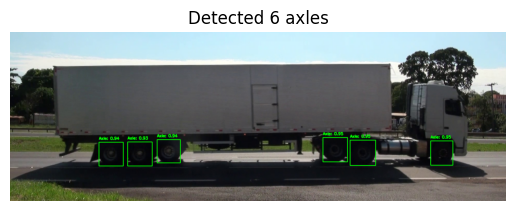

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

model_path = r'best.pt' 
test_image_path = r'D:\sem 5\DL\Project\dataset2\Trucks_YOLO\val\images\20170418101630-550_color-[ROI-1]-11.jpg' # Path to your test image
output_dir = r'runs/detect/images'
os.makedirs(output_dir, exist_ok=True)

model = YOLO(model_path)

results = model(
    test_image_path,
    conf=0.1,  #confidence threshold
    iou=0.5,   #IoU threshold
    device='cpu'
)

axle_count = 0
img = cv2.imread(test_image_path)

# Loop through detected objects
for result in results:
    boxes = result.boxes
    for box in boxes:
        if int(box.cls[0]) == 0:  
            axle_count += 1
            coords = [int(c) for c in box.xyxy[0].tolist()]
            x1, y1, x2, y2 = coords
            conf = box.conf[0]

            # Draw rectangle
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Add label
            label = f"Axle: {conf:.2f}"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#Display Result
print(f"Detected {axle_count} axles in {os.path.basename(test_image_path)}")

#Save result
output_filename = os.path.basename(test_image_path)
output_path = os.path.join(output_dir, output_filename)
cv2.imwrite(output_path, img)
print(f"Result image saved to: {output_path}")

# Display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected {axle_count} axles")
plt.axis('off')
plt.show()